### importar bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Atribui o dataset à uma variável (Data Frame) utilizando o método de leitura de arquivo CSV do pandas

In [2]:
# carregar dataset 2d do viegas
viegasDataSet2D = 'https://secplab.ppgia.pucpr.br/ftp/viegas/ML/datasets/2d_dataset.csv'
df = pd.read_csv(viegasDataSet2D)

### Últimos registros do data Frame

In [3]:
df.tail(2)

,y,alpha,beta
2992,1,744,951
2993,1,152,690


In [4]:
df.dtypes

y        int64
alpha    int64
beta     int64
dtype: object

### Quantidade de Instâncias por atributo

In [5]:
df.count()

y        2994
alpha    2994
beta     2994
dtype: int64

### Determinar características

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2994 entries, 0 to 2993
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   y       2994 non-null   int64
 1   alpha   2994 non-null   int64
 2   beta    2994 non-null   int64
dtypes: int64(3)
memory usage: 70.3 KB


### Descrição dos dados (Utiliza-se para validar se é necessária realizar uma normalização dos dados)


**Normalização dos dados:** é aplicada para deixar o intervalo dos dados o mais próximo possível, pois como estaremos utilizando o algorítimo de classificação kNN (k-Nearest-Neighbor), ele irá calcular a distância entre um objeto a ser identificado (k) de seus vizinhos já identificados, e aplicálo à categoria mais próxima. Como este algorítmo realiza cálculo de distância os dados devem estar **normalizados**, para que o algorítimo não seja influênciado pelos pesos


In [7]:
df.describe()

,y,alpha,beta
count,2994.000000,2994.000000,2994.000000
mean,0.656981,500.917502,501.393454
std,0.474797,289.387318,286.933215
min,0.000000,0.000000,0.000000
25%,0.000000,248.000000,256.000000
50%,1.000000,505.500000,499.000000
75%,1.000000,755.000000,749.000000
max,1.000000,998.000000,999.000000


### Análise de dados

utilizando *slice* para trabalhar com uma pequena parte de um atributo do dataframe

In [8]:
df['alpha'][0:5]

0    681
1    517
2    384
3     41
4    783
Name: alpha, dtype: int64

Retornar todas as instâncias de ```df['aplha']``` maiores que $500$ 

In [9]:
df[df['alpha'] > 500]

,y,alpha,beta
0,1,681,604
1,1,517,783
4,0,783,449
7,0,760,666
12,0,516,859
...,...,...,...
2980,1,882,432
2986,1,630,766
2989,0,722,424
2991,1,789,944


#### Quantidade de dados que possuem o atributo alpha maior que 500

In [10]:
len(df[df['alpha'] > 500])

1508

Portanto, de 2994 instâncias possuimos 1508 das mesmas em que o valor do atributo alpha é maior que 500 

### Ordenação dos dados

É possível realizar a ordenação dos dados do dataframe baseado em um atributo.

Exemplo para ordenação do dataframe baseado no atributo alpha.

*o método head($n$) retorna os $n$ primeiros valores da ordenação*

In [11]:
df.sort_values(by='alpha').head(5)

,y,alpha,beta
716,1,0,917
19,1,0,287
948,1,0,23
129,1,1,442
1793,1,1,7


### Retornar o número de linhas e colunas de um data frame $(rows,columns)$

neste caso o Data Frame possui 2994 instâncias(linhas) e 3 atributos(columns = **'y','alpha', 'beta'**)

In [12]:
df.shape

(2994, 3)

### Quantas entradas possuem $y = 1$ e quantas entradas possuem $y=0$

In [13]:
y0 = len(df[df['y'] == 0])
y1 = len(df[df['y'] == 1])
print(f'Número de entradas com y=0: {y0}\nNúmero de entradas com y=1: {y1}')

Número de entradas com y=0: 1027
Número de entradas com y=1: 1967


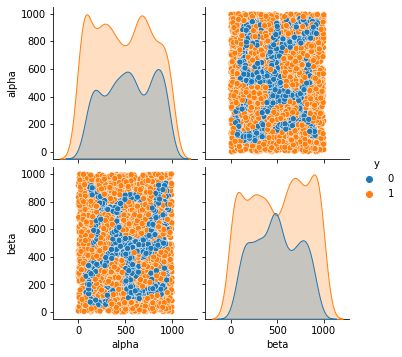

In [14]:
sns.pairplot(df, hue='y')

## Etapas

$\rightarrow$ Criar um classificador

$\rightarrow$  Treinar o classificador

$\rightarrow$  Avaliar o classificador



### Definir valores de I/O (Entrada/Saída)

Input:
 * Aplha
 * Beta
 
Output:
 * y
 
 
### Definindo atributos de saída conhecidos

In [15]:
# entrada = x = ['alpha','beta']
# saida   = y = ['y']
y = np.array(df['y'])

### Defininfo atributos de entrada conhecidos

utiliza-se a notação ```dataframe.drop({column},axis=1)``` para remover a coluna de classe **y** do dataframe, retornando assim um DF somente o dataframe com atributos.

neste caso **aplha** e **beta**


In [16]:
x = np.array(df.drop('y', axis=1))

In [17]:
y

array([1, 1, 0, ..., 1, 1, 1])

In [18]:
x

array([[681, 604],
       [517, 783],
       [384, 513],
       ...,
       [789, 944],
       [744, 951],
       [152, 690]])

### Treinando um kNN

In [19]:
# importa o algorítmo kNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(x,y)


KNeighborsClassifier()

In [20]:
predict = knn.predict(x)

In [21]:
predict

array([1, 1, 0, ..., 1, 1, 1])

In [22]:
y

array([1, 1, 0, ..., 1, 1, 1])

### Cálculo de acurácia

### $$acc = \frac{acertos}{total\_eventos}$$


In [23]:
totalEventos = 0
acertos = 0

for i in range(len(y)):
    if predict[i] == y[i]: 
        acertos+=1
    totalEventos+=1
    
acc = acertos/totalEventos
print(f'Total de eventos: {totalEventos}')
print(f'Total de acertos: {acertos}')
print(f'Acurária: {str(acc*100)[:2]}%')

Total de eventos: 2994
Total de acertos: 2909
Acurária: 97%


## O algorítmo kNN

k-Nearest Neighbor, determina se um elemento pertence à uma classe com base no cálculo da distância euclidiana deste elemento para os demais elementos já conhecidos. A classe é atribuída de acordo com a maioria dos k-vizinhos

## Fórmula da distância euclidiana $$\displaystyle d(x,y) = \sqrt{\sum_{i=0}^{n}{(x_{i}-y_{i})^{2}}}$$


## Formula para normalização dos dados $$\displaystyle valor = \frac{valor-valor^{min}}{valor^{max}-valor^{min}}$$

## Exercícios
 * Faça uma busca dos melhores **hiperparâmetros** do **kNN**
 * Plote a relação entre acurácia e quantidade de vizinhos
 * Plote a relação entre quantidade de vizinhos e tempo de treinamento
 * Plote a relação entre quantidade de vizinhos e tempo de teste
 
*Para medir o tempo utilize o código abaixo*

In [24]:
import time 

initialTime = time.time() * 1000

## code...

endTime = time.time() * 1000
executionTime = endTime - initialTime
print(f'Tempo de execução: {executionTime}')

Tempo de execução: 0.035400390625


In [25]:
import time
# importa o algorítmo kNN
from sklearn.neighbors import KNeighborsClassifier
# importa arquivo
DataSet2D = '/run/media/marcio/3b8079ba-ded2-4741-9021-d63fedc1ef23/datasets/exemplos/2d_dataset.csv'
# create dataset with pandas\
df = pd.read_csv(DataSet2D)
# separaclao classe (y) vetor de atributos (x)
y = np.array(df['y'])
x = np.array(df.drop('y', axis=1))

In [26]:
dataAccTime = []
for qtdVizinhos in range(1,101):
    # tempo de inicio
    initialTime = time.time() * 1000
    # defindindo parametro para o classificador kNN
    knn = KNeighborsClassifier(n_neighbors=qtdVizinhos)
    knn.fit(x,y) # treinando o kNN
    predict = knn.predict(x) # executando uma predicao com kNN
    # -------------------------------------------------------------
    # resultado
    endTime = time.time() * 1000
    executionTime = endTime - initialTime
    totalEventos = 0
    acertos = 0
    acc = 0
    for i in range(len(y)):
        if predict[i] == y[i]: 
            acertos+=1
        totalEventos+=1
    acc = acertos/totalEventos
    dataAccTime.append((qtdVizinhos,acc,totalEventos,acertos,executionTime))
#    print(f'\n----------------------------------------\nTotal de vizinhos: {qtdVizinhos}')
#    print(f'Total de eventos: {totalEventos}')
#    print(f'Total de acertos: {acertos}')
#    print(f'Acurária: {int(acc*100)}%')
#    print(f'Tempo de execução: {executionTime}')

### Plotando a experiência acima com base na Acurácia X k-Vizinhos

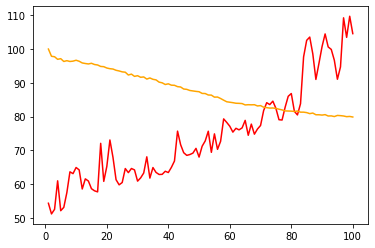

In [27]:
vizinhos = [j[0] for j in dataAccTime]
acuracia = [(j[1]*100) for j in dataAccTime]
totalEventos = [j[2] for j in dataAccTime]
totalAcertos = [j[3] for j in dataAccTime]
tempo = [j[4] for j in dataAccTime]
plt.plot(vizinhos,tempo,color='red')
plt.plot(vizinhos,acuracia,color='orange')
plt.show()

### Plotando a experiência com base na k-Vizinhos X Tempo

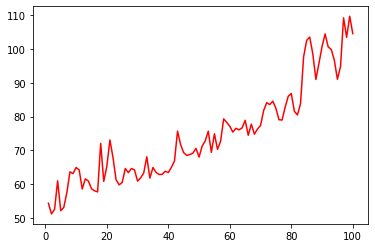

In [28]:
plt.plot(vizinhos,tempo,color='red')
plt.show()

### Plotando a experiência acima com base na k-Vizinhos X Acurácia

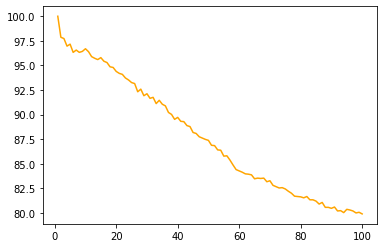

In [29]:
plt.plot(vizinhos,acuracia,color='orange')
plt.show()

# Pratica 3 -> Heart Disease

Utilizar o dataset heart.csv

Este dataset possui 76 atributos.

A coluna "target", é do tipo inteiro 0/1(False/True), refere-se à presença de problemas de coração no paciente.

atributos a serem utilizados:
 * Age
 * Sex
 * Chest pain type (4 values)
 * Resting blood presure
 * Serum cholestoral in mg/dl
 * Fasting blood sugar > 120mg/dl
 * Resting eletrocardigraphic results (1,2,3)
 * Maximum heart rate achieved
 * Exercise induced angina
 * Oldpeak = ST depression induced by exercise relative to rest
 * The slope of the peak exercise ST segment 
 * Number of major vessels (0-3) colored by flourosopy 
 * Thal 
   * 3 Normal
   * 8 Fixed defect
   * 7 Reversable defect
 * Target 0/1 (False/True)
 
 --
 
 Etapas:
 
 1. Fazer a busca pelos hiperparâmetros